# Stochastic Gradient Decent(SGD) for Linear Regression

importing librarys

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
path = '.\\data3.txt'
data = pd.read_csv(path,names=['Population','Profit'])

draw data

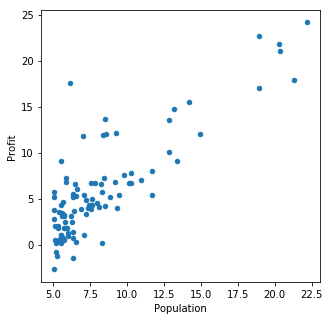

In [51]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

adding a new column called ones before the data

In [52]:
data.insert(0, 'Ones', 1)

separate X (training data) from y (target variable)

In [53]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

convert from data frames to numpy matrices

In [54]:
X = np.matrix(X.values)
y = np.matrix(y.values)

Calculates the cost for given X and Y

In [73]:
def  cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

SGD function

In [74]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [75]:
alpha=0.01
iters = 1000
theta = np.random.randn(2,1)

In [76]:
theta, cost = stocashtic_gradient_descent(X, y, theta, alpha, iters)
print('theta  =',theta)

theta  = [[-3.12977468]
 [ 1.11349519]]


In [77]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0, 0] + (theta[1, 0] * x)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

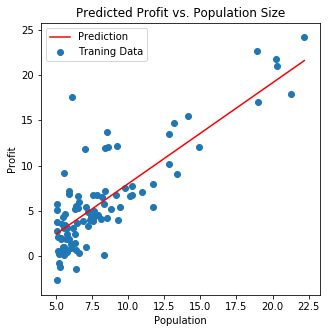

In [78]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

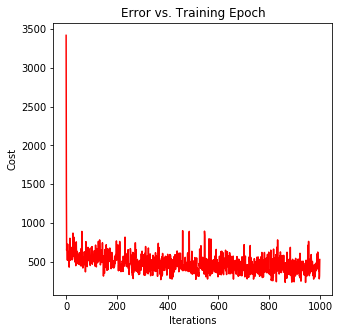

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(max_iter), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')